## **1. 라이브러리**

In [245]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import plotly.express as px

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests


import seaborn as sns

%matplotlib inline

import itertools

In [246]:
sm.__version__

'0.13.0'

## **2. 데이터 EDA**

In [366]:
stock_df = pd.read_csv('data/stock_pys.csv', index_col=0)

In [367]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 1 to 2645
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2645 non-null   object 
 1   애플      2645 non-null   float64
 2   테슬라     2645 non-null   float64
 3   구글      2645 non-null   float64
 4   삼성전자    2571 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.0+ KB


In [368]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 1 to 2645
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2645 non-null   object 
 1   애플      2645 non-null   float64
 2   테슬라     2645 non-null   float64
 3   구글      2645 non-null   float64
 4   삼성전자    2571 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.0+ KB


In [369]:
stock_df = stock_df.sort_values(by="날짜")

In [370]:
stock_df = stock_df.dropna()
stock_df["날짜"] = pd.to_datetime(stock_df["날짜"])
stock_df = stock_df.set_index("날짜").rename_axis("회사명", axis=1)

In [371]:
stock_df.head()

회사명,애플,테슬라,구글,삼성전자
날짜,,,,
2010-10-14,10.80,4.15,270.7,14460.0
2010-10-15,11.24,4.11,301.0,14160.0
2010-10-18,11.36,4.05,309.1,14500.0
2010-10-19,11.05,4.01,304.2,14520.0
2010-10-20,11.09,4.13,304.3,14660.0


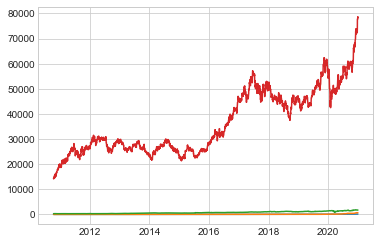

In [372]:
plt.plot(stock_df)

In [373]:
stock_df["삼성전자"] = stock_df["삼성전자"]/1196 #환율

In [374]:
stock_df.head()

회사명,애플,테슬라,구글,삼성전자
날짜,,,,
2010-10-14,10.80,4.15,270.7,12.090301
2010-10-15,11.24,4.11,301.0,11.839465
2010-10-18,11.36,4.05,309.1,12.123746
2010-10-19,11.05,4.01,304.2,12.140468
2010-10-20,11.09,4.13,304.3,12.257525


<AxesSubplot:xlabel='날짜'>

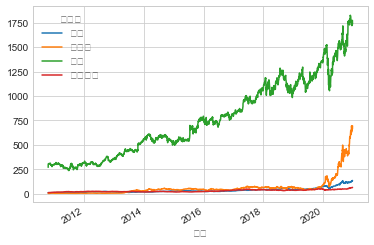

In [375]:
stock_df.plot(kind='line')

In [290]:
fig = px.line(stock_df, x=stock_df.index, y=stock_df.columns)
fig.show()

## **3. 정상성 확인**

In [291]:
for i in stock_df:
    print(i)
    result = adfuller(stock_df[i])
    print('p-value : ', result[1])

    print('-------------------------------------------------------------------------------------------------------')

    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = result[1]
    if pvalue < 0.05:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

애플
p-value :  1.0
-------------------------------------------------------------------------------------------------------
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                    3.290420
p-value                           1.000000
#Lags Used                       28.000000
Number of Observations Used    2542.000000
Critical Value (1%)              -3.432925
Critical Value (5%)              -2.862678
Critical Value (10%)             -2.567376
dtype: float64
테슬라
p-value :  1.0
-------------------------------------------------------------------------------------------------------
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                    7.809458
p-value                           1.000000
#Lags Used                       27.000000
Number of Observations Used    2543.000000
Critical Value (1%)              -3.432924
Critical Value (5%)              -2.862677
Critical Value (10%)             -2.567375
dtype: float64
구글
p-value : 

## **4. 차분**

In [292]:
stock_df_diff = stock_df.copy()
stock_df_diff = stock_df_diff.diff() #default가 1차 차분
stock_df_diff = stock_df_diff.dropna() # 차분 하면 마지막 값이 결측치
print('------ Raw data -----')
print(stock_df)
print('------ Differenced data -----')
print(stock_df_diff)

------ Raw data -----
회사명             애플     테슬라      구글       삼성전자
날짜                                           
2010-10-14   10.80    4.15   270.7  12.090301
2010-10-15   11.24    4.11   301.0  11.839465
2010-10-18   11.36    4.05   309.1  12.123746
2010-10-19   11.05    4.01   304.2  12.140468
2010-10-20   11.09    4.13   304.3  12.257525
...            ...     ...     ...        ...
2020-12-23  130.96  645.98  1728.2  61.789298
2020-12-24  131.97  661.77  1734.2  65.050167
2020-12-28  136.69  663.69  1774.0  65.050167
2020-12-29  134.87  665.99  1757.8  65.802676
2020-12-30  133.72  694.78  1736.3  65.468227

[2571 rows x 4 columns]
------ Differenced data -----
회사명           애플    테슬라    구글      삼성전자
날짜                                     
2010-10-15  0.44  -0.04  30.3 -0.250836
2010-10-18  0.12  -0.06   8.1  0.284281
2010-10-19 -0.31  -0.04  -4.9  0.016722
2010-10-20  0.04   0.12   0.1  0.117057
2010-10-21 -0.04   0.02   2.0  0.150502
...          ...    ...   ...       ...
2020-

In [293]:
for i in stock_df:
    print(i)
    result = adfuller(stock_df_diff[i])
    print('p-value : ', result[1])

    print('-------------------------------------------------------------------------------------------------------')

    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = result[1]
    if pvalue < 0.05:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

애플
p-value :  3.9021755499674875e-13
-------------------------------------------------------------------------------------------------------
p-value = 0.0000. The series is likely stationary.
Test Statistic                -8.306007e+00
p-value                        3.902176e-13
#Lags Used                     2.800000e+01
Number of Observations Used    2.541000e+03
Critical Value (1%)           -3.432926e+00
Critical Value (5%)           -2.862678e+00
Critical Value (10%)          -2.567376e+00
dtype: float64
테슬라
p-value :  2.922042788590606e-07
-------------------------------------------------------------------------------------------------------
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.891175e+00
p-value                        2.922043e-07
#Lags Used                     2.800000e+01
Number of Observations Used    2.541000e+03
Critical Value (1%)           -3.432926e+00
Critical Value (5%)           -2.862678e+00
Critical Value (10%)         

## **5. 분석 타겟 설정**

타겟 설정 
- 테슬라 구글 삼성전자가 애플 주가에 영향을 주었는가?

In [361]:
y='애플'
max_lags = 15 #임의로

In [376]:
for i in range(len(stock_df_diff.columns)-1):
    results=grangercausalitytests(stock_df_diff[[y,stock_df.columns[i+1]]], max_lags, verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('Column - {} : P_Values - {}'.format(stock_df.columns[i+1],p_values))

Column - 테슬라 : P_Values - [0.727, 0.0544, 0.0042, 0.0008, 0.0015, 0.0002, 0.0006, 0.0011, 0.0005, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0]
Column - 구글 : P_Values - [0.1923, 0.4016, 0.1204, 0.1031, 0.0224, 0.0466, 0.003, 0.0023, 0.0004, 0.0002, 0.0005, 0.0003, 0.0001, 0.0002, 0.0001]
Column - 삼성전자 : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [377]:
y='삼성전자'
max_lags = 15

In [378]:
for i in range(len(stock_df_diff.columns)-1):
    results=grangercausalitytests(stock_df_diff[[y,stock_df.columns[i]]], max_lags, verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('Column - {} : P_Values - {}'.format(stock_df.columns[i],p_values))

Column - 애플 : P_Values - [0.0755, 0.0655, 0.0016, 0.0034, 0.0001, 0.0002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - 테슬라 : P_Values - [0.727, 0.0544, 0.0042, 0.0008, 0.0015, 0.0002, 0.0006, 0.0011, 0.0005, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0]
Column - 구글 : P_Values - [0.1923, 0.4016, 0.1204, 0.1031, 0.0224, 0.0466, 0.003, 0.0023, 0.0004, 0.0002, 0.0005, 0.0003, 0.0001, 0.0002, 0.0001]


## **6. 예측모델**

In [365]:
model = VAR(stock_df_diff)

#max_lags = 몇일까지 영향을 주나

for i in range(50):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  6.610349772675564
BIC:  6.6559026881843995
Order =  2
AIC:  6.598366554766078
BIC:  6.680388274366216
Order =  3
AIC:  6.591605743998893
BIC:  6.710119824795659
Order =  4
AIC:  6.580045912492831
BIC:  6.735075936293274
Order =  5
AIC:  6.5644037523463945
BIC:  6.755973325694858
Order =  6
AIC:  6.527650274995287
BIC:  6.755783029209038
Order =  7
AIC:  6.505717330716418
BIC:  6.7704369219213465
Order =  8
AIC:  6.482341570848013
BIC:  6.7836716800143995
Order =  9
AIC:  6.454225999141847
BIC:  6.792190332120187
Order =  10
AIC:  6.438327684239662
BIC:  6.812949971796566
Order =  11
AIC:  6.429577838862052
BIC:  6.840881836716199
Order =  12
AIC:  6.433798205341381
BIC:  6.881807694199552
Order =  13
AIC:  6.38855373290987
BIC:  6.873292518503038
Order =  14
AIC:  6.362376622327919
BIC:  6.883868535447408
Order =  15
AIC:  6.361566963449291
BIC:  6.919835859982999
Order =  16
AIC:  6.360032462665012
BIC:  6.955102223633707
Order =  17
AIC:  6.352231702262666
BIC:  6.98

In [333]:
model.select_order(50).summary()

,AIC,BIC,FPE,HQIC
0,25.93,25.94,1.829e+11,25.94
1,5.993,6.040,400.7,6.010
2,5.952,6.037*,384.6,5.983
3,5.939,6.062,379.7,5.984
4,5.927,6.087,375.2,5.985
5,5.924,6.122,374.0,5.996
6,5.868,6.103,353.6,5.954
7,5.835,6.108,342.0,5.934
8,5.811,6.121,333.8,5.923
9,5.775,6.123,322.3,5.902


aic가 낮은 모델 선택 48

In [355]:
# model fitting
model = VAR(stock_df_diff)
results = model.fit(maxlags=48)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 05, Dec, 2021
Time:                     09:29:26
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    7.71110
Nobs:                     2522.00    HQIC:                   6.57356
Log likelihood:          -21014.5    FPE:                    374.969
AIC:                      5.92564    Det(Omega_mle):         279.188
--------------------------------------------------------------------
Results for equation 애플
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.031119         0.017239            1.805           0.071
L1.애플           -0.039755         0.025139           -1.581           0.114
L1.테슬라           0.011784         0.004362            2.702           0.007
L1.구글  

## **7. 더빈왓슨 검증**

In [344]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(results.resid)

for col, val in zip(stock_df_diff.columns, out):
    print(col, ':', round(val, 2))

애플 : 2.0
테슬라 : 2.0
구글 : 2.0
삼성전자 : 2.0


자기상관성이 있는지 없는지를 판단 = 2에 가까울수록 자기상관성 없음

## **8. Granger 인과성 검증**

In [356]:
from statsmodels.tsa.stattools import grangercausalitytests


maxlag = 49
test = 'ssr_chi2test'

def grangers_causation_matrix(stock_df, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            
            test_result = grangercausalitytests(stock_df[[r,c]].values, maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(stock_df_diff, variables = df_train.columns)

,애플_x,테슬라_x,구글_x,삼성전자_x
애플_y,1.0,0.0,0.0,0.0
테슬라_y,0.0,1.0,0.0,0.0
구글_y,0.0,0.0,1.0,0.0
삼성전자_y,0.0,0.0,0.0,1.0


딱딱한 설명
- 두 개의 시계열 데이터에서 한 변수(한 시계열)의 과거데이터와 다른 한 변수(시계열)의 과거데이터의 결합으로 그 변수(처음 시계열)를 선형 예측(linear regression)을 했을 때 다른 한 변수의 과거데이터로만 선형예측 한 것이 통계적으로 유의미하고 예측에 도움을 줬다면 그것을 그래인저 인과(Granger Causality)가 있다고말한다.

쉬운 설명
- 동일한 시간축의 범위를 가진 두 데이터가 있을 때 한 데이터를 다른 한쪽의 데이터의 특정한 시간간격에 대해서 선형회귀를 할 수 있다면 그래인저 인과가 있다고 하는 것이다.

- 예를들어 만약 A와 B라는 데이터가 모두 1일 단위로 집계된 데이터이고 365일분의 데이터라고 가정할 때 A와 A의 시점으로부터 각각 5일 후의 데이터가 선형회귀가 된다면 A는 B의 그래인저 인과라고 부른다. 그리고 시간차는 5일이므로 A는 B에게 약 5일후에 영향을 주는 인과 요인인것이다.

오해석에 대한 유의
- 이름이 그래인저 인과관계(Granger Causality)라고 되어 있는데 실제 사람들이 흔히 생각하는 인과(causality)와는 다르게 생각해야 하므로 이 검정의 결과를 가지고 확대해석 또는 오해석(착각)하는 것은 매우 경계해야 한다.

- 달걀의 개체수의 증가가 미래의 닭의 개체수의 증가에 인과영향이 있다는 사실이 밝혀졌다고 해서 반드시 닭의 수의 요인은 달걀의 개체수다라고 확신해서 말하는 것은 무리가 있다. 단순히 달걀의 생산량을 증가시키면 닭의 수가 늘어나게 된다고 확대해석을 하기 때문이다.그래서 그래인저 인과관계는 줄여서 인과관계라고 하지 않고 확실하게 “그레인저 인과관계”라고 명시하는 경우가 많다.
- 그것은 그래인저 인과관계가 일반적인 인과관계를 말하는 것이 아니며 사람들이 생각하는 추상적인 인과관계를 명확하게 밝혀내서 확실하게 알려줄 것이라는 기대감을 주지 않기 위함이다.

- 그래인저 인과관계는 상관관계(correlation)처럼 결과를 해석할 때 논리적으로 결함이 없는지 여러번 고찰하고 해석할 때 매우 주의해야 한다. 특히 경제문제가 아닌 자연과학이나 사회과학 문제에 적용할 때는 더더욱 주의해야 한다.

## **9. 예측**

In [357]:
# forecasting
lag_order = results.k_ar
results.forecast(stock_df_diff.values[-lag_order:], 50)

array([[ 9.51416672e-01, -1.76735715e+01,  8.57280807e+00,
         1.61288643e-01],
       [ 1.57591868e+00,  7.03218289e+00,  2.36153432e+01,
         1.14092234e+00],
       [ 1.56241337e+00,  1.76236172e+00, -1.81550033e+01,
        -3.27649694e-01],
       [-6.28473191e-01,  2.86716283e+00,  7.00999505e-01,
         7.39636445e-01],
       [-1.58199036e-01,  1.04537460e+01,  1.06198784e+01,
         1.21438858e+00],
       [-8.59307968e-01, -7.55094978e-01, -3.82267811e+01,
         9.35365885e-02],
       [ 3.04376414e+00, -1.59617175e+01,  2.47506495e+01,
        -7.29030645e-01],
       [ 1.71709670e+00,  1.26374571e+01,  1.76178217e+01,
         8.42492078e-01],
       [ 4.61265023e+00,  3.36091534e+01,  6.88895407e+01,
         2.85156745e-01],
       [-1.32424387e+00,  1.82224271e+00, -6.94521197e+00,
        -4.75642291e-01],
       [ 2.71607273e+00,  4.79123188e+00,  3.19606752e+01,
         3.56489277e-01],
       [ 1.54686867e+00, -1.08183875e+01,  1.90605105e+01,
      

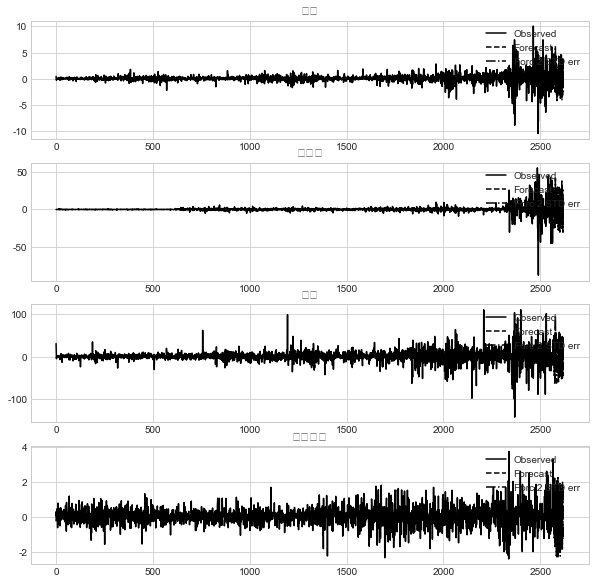

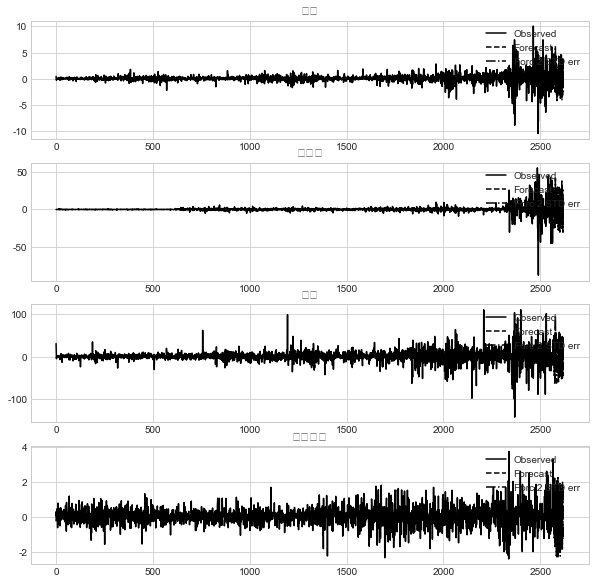

In [358]:
# plotting
results.plot_forecast(50)

In [359]:
# Evaluation
fevd = results.fevd(50)
fevd.summary()

FEVD for 애플
            애플       테슬라        구글      삼성전자
0     1.000000  0.000000  0.000000  0.000000
1     0.992027  0.002711  0.005074  0.000188
2     0.978675  0.014349  0.005022  0.001954
3     0.977380  0.015245  0.005237  0.002137
4     0.975820  0.015227  0.005605  0.003348
5     0.975603  0.015418  0.005620  0.003360
6     0.943770  0.017891  0.034306  0.004033
7     0.926426  0.019413  0.050224  0.003937
8     0.924328  0.020982  0.050760  0.003930
9     0.923173  0.021243  0.051365  0.004219
10    0.919009  0.025439  0.051287  0.004265
11    0.911719  0.031232  0.050924  0.006125
12    0.909243  0.032635  0.051373  0.006749
13    0.905099  0.034608  0.051539  0.008754
14    0.892574  0.042211  0.055710  0.009506
15    0.891265  0.042384  0.056751  0.009600
16    0.884226  0.046405  0.059815  0.009554
17    0.879941  0.047609  0.062659  0.009791
18    0.872807  0.049557  0.062522  0.015114
19    0.865717  0.052006  0.067283  0.014994
20    0.851839  0.064777  0.066244  0.01714

In [360]:
lag_order = results.k_ar
nobs = 50
df_input = stock_df_diff.values[-lag_order:]

# forecasting
print(results)
pred = results.forecast(y=df_input, steps = nobs)
df_forecast = pd.DataFrame(pred, index=stock_df_diff.index[-nobs:], columns=stock_df_diff.columns + '_1d')
df_forecast.tail()
# inverting transformation
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train
    for col in columns:        
        print(col)       
        df_fc[str(col)+'_forecast'] = stock_df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast)        
df_results.loc[:, :]


원래데이터 - 아리마(p,d,q) - 결과 

애플
테슬라
구글
삼성전자


회사명,애플_1d,테슬라_1d,구글_1d,삼성전자_1d,애플_forecast,테슬라_forecast,구글_forecast,삼성전자_forecast
날짜,,,,,,,,
2020-10-20,0.951417,-17.673571,8.572808,0.161289,134.671417,677.106429,1744.872808,65.629516
2020-10-21,1.575919,7.032183,23.615343,1.140922,136.247335,684.138611,1768.488151,66.770438
2020-10-22,1.562413,1.762362,-18.155003,-0.327650,137.809749,685.900973,1750.333148,66.442789
2020-10-23,-0.628473,2.867163,0.701000,0.739636,137.181276,688.768136,1751.034148,67.182425
2020-10-26,-0.158199,10.453746,10.619878,1.214389,137.023076,699.221882,1761.654026,68.396814
2020-10-27,-0.859308,-0.755095,-38.226781,0.093537,136.163769,698.466787,1723.427245,68.490350
2020-10-28,3.043764,-15.961718,24.750650,-0.729031,139.207533,682.505069,1748.177894,67.761320
2020-10-29,1.717097,12.637457,17.617822,0.842492,140.924629,695.142527,1765.795716,68.603812
2020-10-30,4.612650,33.609153,68.889541,0.285157,145.537280,728.751680,1834.685257,68.888969


https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2

https://www.youtube.com/watch?v=TpQtD7ONfxQ

https://intothedata.com/02.scholar_category/timeseries_analysis/granger_causality/

https://colab.research.google.com/drive/14wOi-bfjOtIx9cBoSmywDN83XtrxP6UB?usp=sharing#scrollTo=oC5AefPqOVf9